# Pangeo Forge

### What is Pangeo Forge?

Pangeo Forge is an open source tool that extracts, transforms, and loads (ETL) data. 
An example of an ELT tool would be Oracle. 

It's goal is to make it easier to extract data from traditional data reposoitories and deposit in cloud object storage in analysis-ready, cloud-optimized (ARCO) format.
An example data repositories would be a data warehouse, data lake, data marts, metadata repositories, data cubes.

It's inspired by Conda Forge which is a community-led collection of recipes for building conda packages. Pangeo Forge can play the same role but for datasets.

## Why do we need Pangeo Forge?

The weather and climate data is large and complex, so our solution is data-proximate computing in the cloud. The problem with this is that anaylsis-ready, cloud-optimized data is scarce. The solution is Pangeo Forge.

Anaylsis-ready should be thought of as datasets and not as data files. There is no need to have cleaning steps and they are organized. 
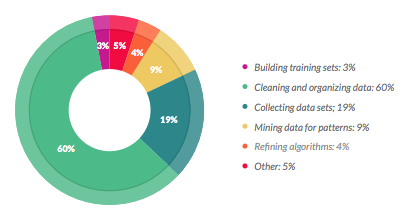

According to Crowdflower report 2016, this is how data scientists utilize their time when cleaning data for scientific anaylsis and discovery

Cloud Optimized is compatible with object storage, supports lazy access and intelligent subsetting. It integrates with high-level analysis libraries and frameworks. 

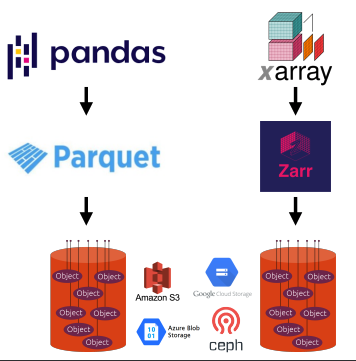

Creating ARCO data is hard to do. To create useful ARCO data, there must be:

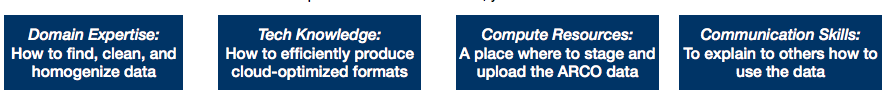

An example of ARCO data is when everything is in one dataset object, there is rich metadata and chunked appropriately for analysis.

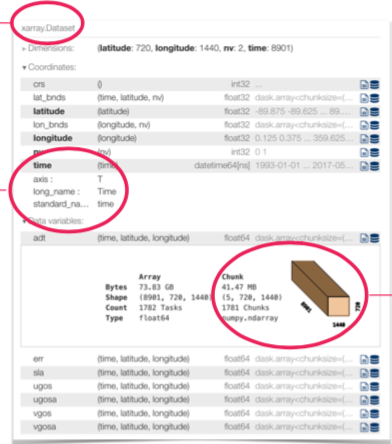

## Goals for Pangeo Forge

1. Foster collaboration around the open source scientific python ecosystem for ocean / atmosphere / land / climate science.

2. Support the development with domain-specific geoscience packages.

3. Improve scalability of these tools to handle petabyte-scale datasets on HPC and cloud platforms.

## Road Map

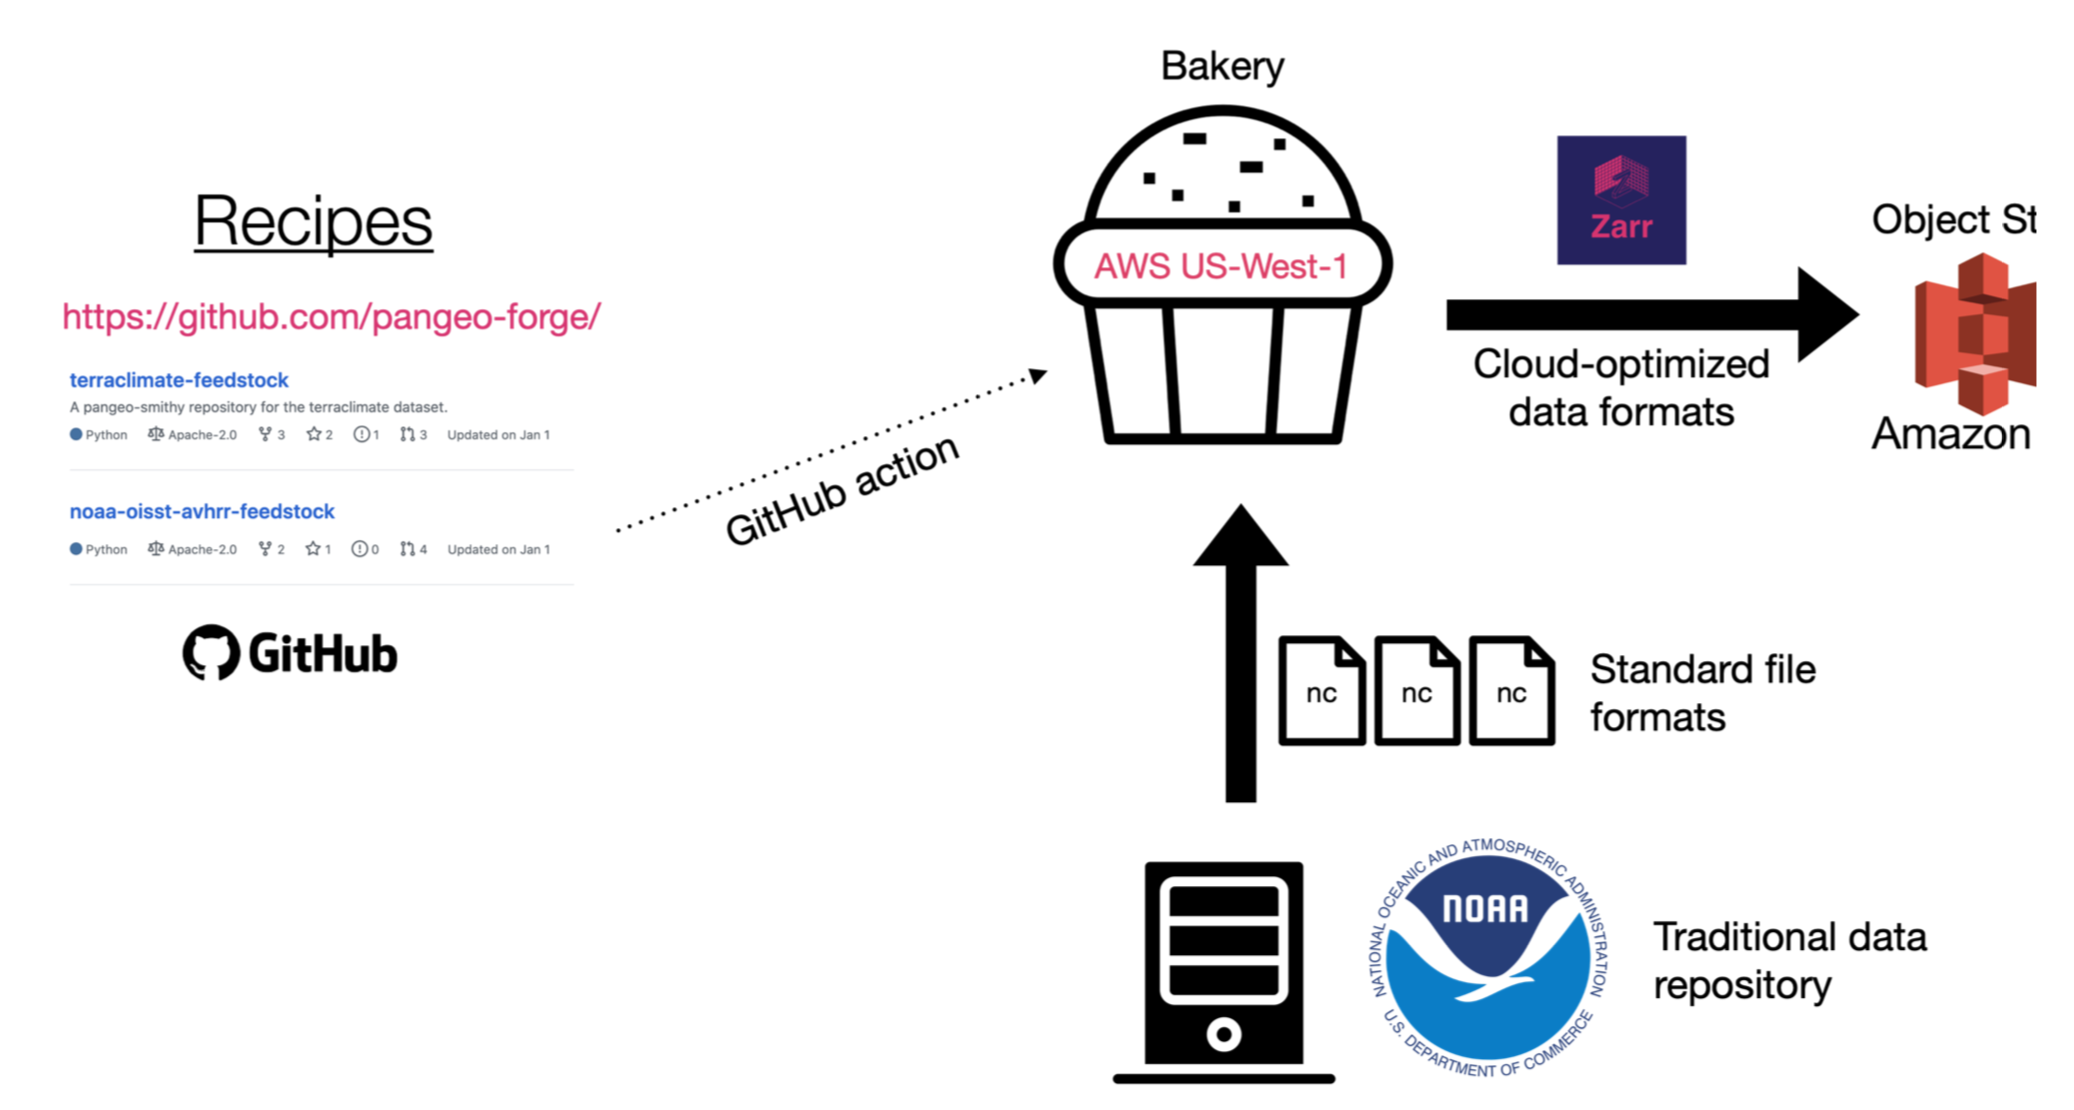

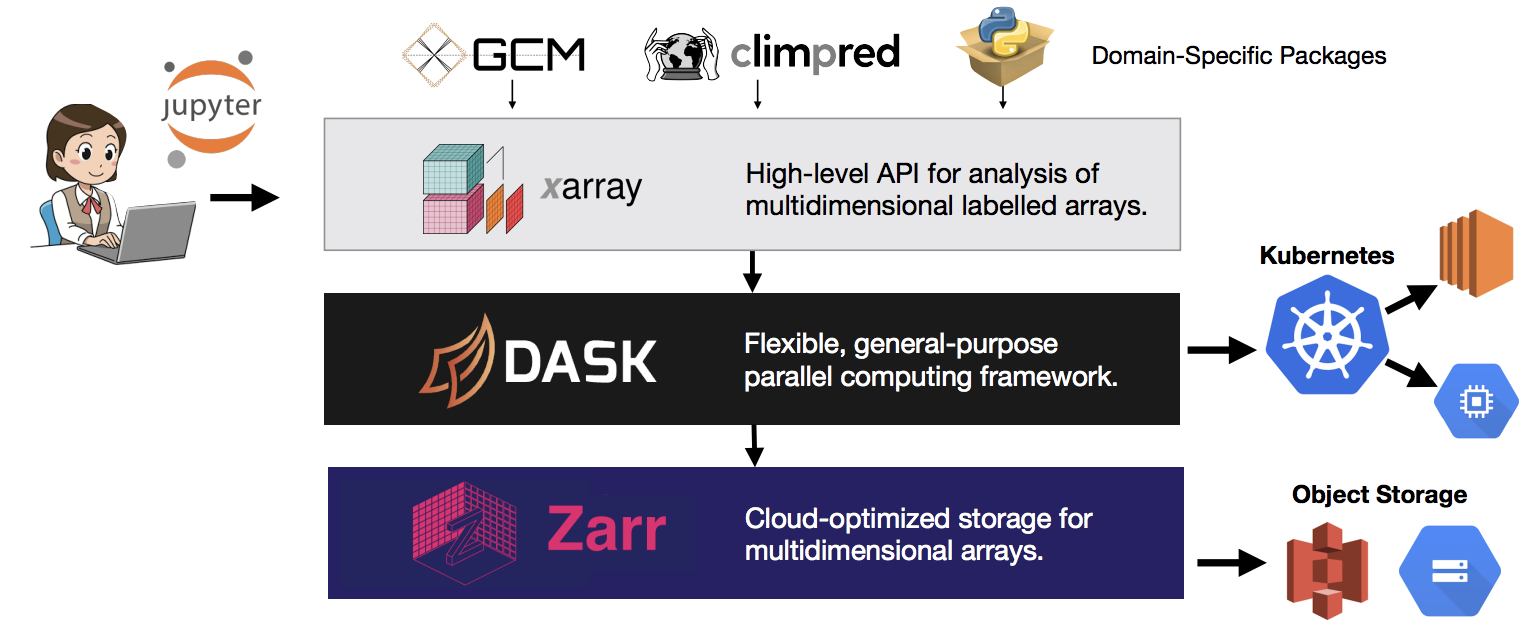

"Dask is a free and open-source library for parallel computing in Python. Dask helps you scale your data science and machine learning workflows. Dask makes it easy to work with Numpy, pandas, and Scikit-Learn, but that's just the beginning."

## What is a bakery?

Bakeries are cloud-based enviornments for running reciped from the Recipe Box (public database of Pangeo Forge Recipes). There are two types of bakeries, one is for Amazon Web Services Cloud and the other is for Microsoft Azure Cloud. 

## What is a recipe?

We import pangeo_forge_recipes Python package and it can be used on its own or as part of an automated recipe. In a recipe we have file patterns, a recipe object and the recipe execution. File patterns are the starting point of the recipe and they are considered as the ingreidents on which the recipe will act on. They describe how many individual sorce files are organized as part of a larger dataset. 

### Example of File Pattern

Imagine this is our set of file paths:

http://data-provider.org/data/temperature/temperature_01.txt

http://data-provider.org/data/temperature/temperature_02.txt

...

http://data-provider.org/data/temperature/temperature_10.txt

http://data-provider.org/data/humidity/humidity_01.txt

http://data-provider.org/data/humidity/humidity_02.txt

...

http://data-provider.org/data/humidity/humidity_10.txt


We have two dimensions, our variables (temperature and humidity) and time (1-10) so the product of these (20) determines the total of files we have. The unqiue identifiers for each dimension (temperature or humidity; 1-10) are referred to as the keys for our file pattern. pangeo_forge_recipes.patterns.FilePattern is meant to describe the logical organization of these files themselves. 

### Creating a FilePattern

In [1]:
def make_full_path(variable, time):
    return f"http://data-provider.org/data/{variable}/{variable}_{time:02d}.txt"

make_full_path("humidity", 3)

'http://data-provider.org/data/humidity/humidity_03.txt'

### Combining Dimensions

In [1]:
import sys
sys.path.append('/home/jovyan/repos/hemasphere/botpt/pangeo-forge-recipes')
import pangeo_forge_recipes

In [4]:
from pangeo_forge_recipes.patterns import MergeDim
variable_merge_dim = MergeDim("variable", ["temperature", "humidity"])
variable_merge_dim

MergeDim(name='variable')

In [5]:
type(variable_merge_dim)

pangeo_forge_recipes.patterns.MergeDim

In [6]:
dir(variable_merge_dim)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'keys',
 'name',
 'operation']

In [9]:
variable_merge_dim?

Type:        MergeDim
String form: MergeDim(name='variable')
File:        ~/repos/hemasphere/botpt/pangeo-forge-recipes/pangeo_forge_recipes/patterns.py
Docstring:  
Represents a merge operation across a dimension of a FilePattern.

:param name: The name of the dimension we are are merging over. The actual
   value is not used by most recipes. The most common value is
   ``"variable"``.
:param keys: The keys used to represent each individual item along this
  dimension. This will be used by a ``FilePattern`` object to evaluate
  the file name.


In [10]:
variable_merge_dim.keys

['temperature', 'humidity']

In [14]:
variable_merge_dim.operation

<CombineOp.MERGE: 1>

In [15]:
from pangeo_forge_recipes.patterns import ConcatDim
time_concat_dim = ConcatDim("time", list(range(1, 11)))
time_concat_dim

ConcatDim(name='time', nitems_per_file=None)

In [16]:
from pangeo_forge_recipes.patterns import FilePattern
pattern = FilePattern(make_full_path, variable_merge_dim, time_concat_dim)
pattern

<FilePattern {'variable': 2, 'time': 10}>

## Storage

We need to store data somewhere, the location where the final dataset is produced is stored in something called the Target. We use the class pangeo_forge_recipes.storage.FSSpecTarget. Creating a Target requires two arguments: root_path which specificies the path the data should be stored in and fs which is an fsspec filesystem

### Example of creating a Target for AWS S3

Fsspec is a library that acts as a common pythonic interface to many file system-like storage backends, like remote and cloud services. 

## Recipe Types

In order to write a recipe, we have to start from one of existing ones. There is only one recipe class implemented which is the XarrayZarr Recipe: pangeo_forge_recipes.recipes.XarrayZarrRecipe. This class uses Xarrays to read the input files and Zarr as the target dataset format. 

https://pangeo-forge.readthedocs.io/en/latest/recipe_user_guide/recipes.html

There is also HDF Reference Recipe that allows us to be more efficent when accessing data from NetCDF/HDF files. This recipe does not copy the original source data but insteads generates metadata files which is referred and index the original data which allows it to be accessable quicker.

### Overview 

### Recipe Execution

#### Maunal Execution:

Stage 1: Cache Inputs

Stage 2: Prepare Targets

Stage 3: Store Chunks

Stage 4: Finalize Target

### Compiled Recipes
1. Python Function

2. Dask Delay

3. Prefect Flow

4. Beam PTransform

# Introduction Tutorial

## Steps

1. Fork the GitHub repo

2. Develop the recipe

3. Submit the new recipe as a pull request

## Forking

Go to this link: https://github.com/pangeo-forge/staged-recipes and click fork in the top right. Currently this is what the directory structure of this repo is 

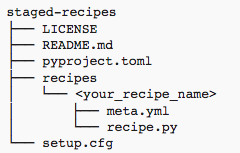

## Developing a recipe:

Ingredients: two main files, meta.yaml and recipe.py

## meta.yaml

Metadata that decribes your recipe. It would show the specify recipe enviornment, define the recipe name and where to find the recipe object, the specify bakery and compute resources. Details on the available bakeries can be found in the bakeries.yaml. The final section includes metadata about the dataset and maintainers of the recipe. The dataset metadata can be used to create a STAC catalog to aid in dataset discoverability

### specify recipe enviornment

pangeo_forge_version: "0.5.0"  # pypi version of pangeo-forge
pangeo_notebook_version: "2021.07.17"  # docker image that the flow will run in

### recipe name and where to find the object
recipes:
  - id: noaa-oisst-avhrr-only  # name of feedstock?
  - object: "recipe:recipe"  # import schema for recipe object {module}:{object}
    
### specific bakery and compute resources
bakery:
  - id: "devseed.bakery.development.aws.us-west-2"  # must come from a valid list of bakeries
  - target: pangeo-forge-aws-bakery-flowcachebucketdasktest4-10neo67y7a924
  - resources:
    - memory: 4096
    - cpu: 1024
    
    
### metadata about the dataset and maintainers of the recipe
title: "NOAA Optimum Interpolated SST" #Dataset title

description: "Analysis-ready Zarr datasets derived from NOAA OISST NetCDF" #Short dataset description

provenance:
 - providers:
    - name: "NOAA NCEI" #dataset distributor/source
      description: "National Oceanographic & Atmospheric Administration National Centers for Environmental Information"
      roles:
        - producer
        - licensor
      url: https://www.ncdc.noaa.gov/oisst
  license: "CC-BY-4.0"
maintainers:
  - name: "Ryan Abernathey"
  - orcid: "0000-0001-5999-4917"
  - github: rabernat

## recipe.py

This is where the processing steps are defined. For detailed descriptions look at recipe-user-guide. First we have our imports, then define inputs to the recipe (the start date, end date, etc). The FilePattern part of the recipe is a crucial bit that defines the location of the input files. By exploring the input data source, you can determine a basic filepattern and then recreate it in the FilePattern part of the recipe.

### Import statements
import pandas as pd

from pangeo_forge_recipes.patterns import ConcatDim, FilePattern

from pangeo_forge_recipes.recipes import XarrayZarrRecipe

### Define inputs to recipe 
start_date = "1981-09-01"
end_date = "2021-01-05"


def format_function(time):

    base = pd.Timestamp(start_date)
    
    day = base + pd.Timedelta(days=time)
    
    input_url_pattern = (
        "https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation"
        "/v2.1/access/avhrr/{day:%Y%m}/oisst-avhrr-v02r01.{day:%Y%m%d}.nc"
    )
    
    return input_url_pattern.format(day=day)


dates = pd.date_range(start_date, end_date, freq="D")

pattern = FilePattern(format_function, ConcatDim("time", range(len(dates)), 1))

recipe = XarrayZarrRecipe(pattern, inputs_per_chunk=20, cache_inputs=True)

## Testing

We create a pruned copy of the first two entries for testing using recipe.copy_pruned(). (Pruned copy ? does that mean we cut out unnecessary things

Using ffspec and pangeo_forge_recipes, we can create a LocalFileSystem to cache recipe data. If you wish you can use any ffspec file system instead of a LocalFileSystem ex. (s3fs, gcsfs etc.)

Optionally we can setup logging to see under the hood a bit.

Finally we can verify a slice of the dataset

## Submitting the Recipe

Once the local recipe testing passes successfully, you can submit the recipe for execution. To do this, create a pull request in the staged-recipes repository (https://github.com/pangeo-forge/staged-recipes)

## Automated Tests

Once a pull request of the recipe has been submitted, one of the pangeo-forge maintainers can trigger a CI test by running:

